In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt

In [2]:
df = pd.read_table('Medicare_Provider_Util_Payment_PUF_CY2015.txt', skiprows=range(1, 2))

/Users/home/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99217,Hospital observation care discharge,N,23.0,23,23,72.680000,328.000000,54.502609,55.280870
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99219,Hospital observation care typically 50 minutes,N,18.0,18,18,135.850000,614.000000,100.958889,102.348889
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58,59,101.365085,333.288136,79.469661,80.859831
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130,132,139.010455,356.492424,107.933409,107.969621
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215,220,205.185955,631.186364,157.908955,160.930409


In [3]:
list(df)

['npi',
 'nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_provider_gender',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip',
 'nppes_provider_state',
 'nppes_provider_country',
 'provider_type',
 'medicare_participation_indicator',
 'place_of_service',
 'hcpcs_code',
 'hcpcs_description',
 'hcpcs_drug_indicator',
 'line_srvc_cnt',
 'bene_unique_cnt',
 'bene_day_srvc_cnt',
 'average_Medicare_allowed_amt',
 'average_submitted_chrg_amt',
 'average_Medicare_payment_amt',
 'average_Medicare_standard_amt']

In [5]:
df_test = df[['nppes_provider_last_org_name','nppes_provider_first_name','nppes_provider_zip', 'average_Medicare_allowed_amt',
 'average_submitted_chrg_amt',
 'average_Medicare_payment_amt',
 'average_Medicare_standard_amt']]

In [6]:
df_test.head(5)

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_zip,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,ENKESHAFI,ARDALAN,215021854,72.680000,328.000000,54.502609,55.280870
1,ENKESHAFI,ARDALAN,215021854,135.850000,614.000000,100.958889,102.348889
2,ENKESHAFI,ARDALAN,215021854,101.365085,333.288136,79.469661,80.859831
3,ENKESHAFI,ARDALAN,215021854,139.010455,356.492424,107.933409,107.969621
4,ENKESHAFI,ARDALAN,215021854,205.185955,631.186364,157.908955,160.930409


In [7]:
df_test.dtypes

nppes_provider_last_org_name      object
nppes_provider_first_name         object
nppes_provider_zip                object
average_Medicare_allowed_amt     float64
average_submitted_chrg_amt       float64
average_Medicare_payment_amt     float64
average_Medicare_standard_amt    float64
dtype: object

In [8]:
df_test['nppes_provider_zip'] = df_test['nppes_provider_zip'].astype(str).str.slice(0,5)

/Users/home/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
temp = df_test['nppes_provider_zip']

/Users/home/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
search_zip = pd.to_numeric(temp, errors='coerce')
search_zip.fillna(0, inplace=True)
temp = 0

In [17]:
zip_matching = genfromtxt('US Zip Codes from 2013 Government Data.csv', delimiter=',')
zip_matching = zip_matching[1:]
zipcode = zip_matching[:,0]

In [21]:
search_zip = search_zip.as_matrix()

AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

array([ 21502.,  21502.,  21502., ...,  23116.,  23116.,  23116.])

In [6]:
df_test.hist(column = 'average_Medicare_allowed_amt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1190e4470>]], dtype=object)

In [7]:
matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1190f2ba8>]], dtype=object)

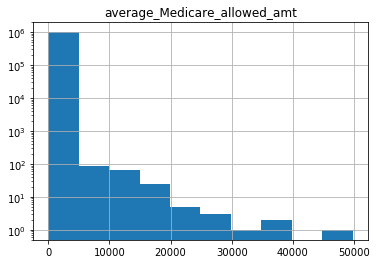

In [9]:
df_test.hist(column = 'average_Medicare_allowed_amt',log=True)

In [53]:
location.latitude

37.392783761946

-122.104306959532